In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import scale
import scipy.ndimage
from scipy import misc

In [2]:
CIFAR10 = np.load('../../Deep Learning Folder/CIFAR-10_cats_dogs/CIFAR-10_cats_dogs.npz')
images = CIFAR10['images']
label_names = CIFAR10['label_names']
labels = np.array(CIFAR10['labels'])

print(label_names)
print('images shape:',images.shape)
print('labels shape:',labels.shape)

['airplane' 'automobile' 'bird' 'cat' 'deer' 'dog' 'frog' 'horse' 'ship'
 'truck']
images shape: (10000, 32, 32, 3)
labels shape: (10000,)


In [3]:
def show_image(image):
        plt.imshow(image)

In [4]:
show_image(downscaled_images[0])
show_image(images[0])

NameError: name 'downscaled_images' is not defined

In [6]:
'''This code creates downscaled datasets that can be used for training. 
'''

downscaled_images = np.array([misc.imresize(i,[16,16]) for i in images])
#downscaled_test = np.array([scipy.ndimage.zoom(i,.5,mode='nearest') for i in test_images])
print(downscaled_images.shape)
print(images.shape)



(10000, 16, 16, 3)
(10000, 32, 32, 3)


In [7]:
'''
Model 3

Uses convolution
'''
def weight_variable(shape):
  initial = tf.truncated_normal(shape, stddev=0.1)
  return tf.Variable(initial)

def bias_variable(shape):
  initial = tf.constant(0.1, shape=shape)
  return tf.Variable(initial)

def conv2d(x, W, stride_input = [1, 2, 2, 1]):
  return tf.nn.conv2d(x, W, strides = stride_input, padding='SAME')


small_train = tf.placeholder('float32', shape = [None, 16, 16, 3])
large_train = tf.placeholder('float32', shape = [None, 32, 32, 3])

small_train_flattened = tf.reshape(small_train,[-1,16*16*3])
large_train_flattened = tf.reshape(large_train,[-1,32*32*3])

reshaped_to_image_format = tf.reshape(small_train,[-1, 16, 16, 3])

n_1 = 128
n_2 = 64
#n_3 = 


w_conv2 = weight_variable([4,4,3,n_2]) #7
b_conv2 = bias_variable([n_2])
h_conv2 = conv2d(large_train, w_conv2, stride_input = [1, 1, 1, 1])


w_conv_inv1 = weight_variable([4,4,3,n_2])
#b_conv_inv1 =
h_conv_inv1 = tf.nn.conv2d_transpose(h_conv2, w_conv2, [100,32,32,3], [1,1,1,1])

final = h_conv_inv1

prediction = tf.nn.relu(tf.reshape(final,[-1,32*32*3]))

#h_pool1 = max_pool_2x2(h_conv1)

#Decision layer
#w = tf.Variable(tf.truncated_normal([14*14, 28*28]))
#b = tf.Variable(tf.truncated_normal([1,28*28]))
#prediction = tf.matmul(small_train_flattened,w)+b


#Loss / prediction / optimization etc. 
MSE = tf.reduce_mean(tf.square(prediction - large_train_flattened))
pred = tf.cast(final,dtype=tf.uint8)
optimizer = tf.train.AdamOptimizer().minimize(MSE)

init = tf.initialize_all_variables()

In [8]:
sess = tf.Session()
sess.run(init)

In [10]:
MAXSTEPS = 20001
for step in range(MAXSTEPS):
    (_,mse) = sess.run([optimizer,MSE],feed_dict = {small_train: downscaled_images[0:100], large_train: images[0:100]})
    if (step % 100) == 0:
        test_mse = sess.run(MSE, feed_dict = {small_train: downscaled_images[100:200], large_train: images[100:200]})
        print('step = %-5d MSE = %-10f Test MSE = %-10f' % (step,mse,test_mse))
print("Done!")

step = 0     MSE = 850.121765 Test MSE = 840.648560
step = 100   MSE = 706.948853 Test MSE = 702.136353
step = 200   MSE = 597.760864 Test MSE = 596.078674
step = 300   MSE = 511.916046 Test MSE = 512.494080
step = 400   MSE = 442.972351 Test MSE = 445.308685
step = 500   MSE = 386.846283 Test MSE = 390.470978
step = 600   MSE = 340.618378 Test MSE = 345.141296
step = 700   MSE = 302.055145 Test MSE = 307.228119
step = 800   MSE = 269.508636 Test MSE = 275.129181
step = 900   MSE = 241.790344 Test MSE = 247.695892


KeyboardInterrupt: 

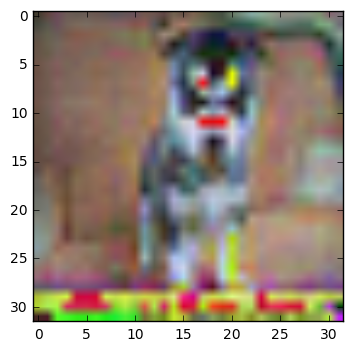

In [18]:
test_pred = sess.run(pred, feed_dict = {large_train: images[0:100]})
train_pred = sess.run(pred, feed_dict = {large_train: images[100:200]})
to_show = 0
plt.imshow(train_pred[2])


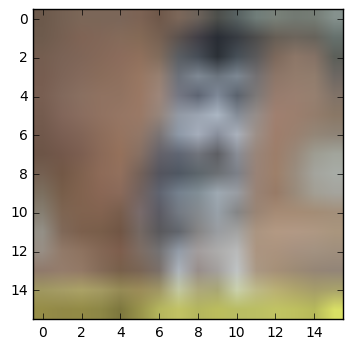

In [16]:
plt.imshow(downscaled_images[102])